In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("results.csv")

df.dropna()

df

,Name,Size,Category,Files,FilesSize,Time,Activities,Permissions,Services,Providers,...,PaprikaTime,Relda2,Relda2Time,EarmoClassification,KadabraClassification,LintClassification,ADoctorClassification,PaprikaClassification,Relda2Classification,Label
0,com.tailscale.ipn,34.91,Connectivity,15,0.08,572.656413,1,9,6,1,...,41.561593,3,33.672338,4,4,5,3,1,3,C
1,com.activitymanager,4.04,Development,104,0.88,419.499558,10,3,1,2,...,57.809331,9,192.797085,5,5,5,1,1,1,C
2,com.gitlab.ardash.appleflinger.android,10.58,Games,73,0.40,170.756928,1,0,0,0,...,25.378221,4,3.747890,2,1,5,2,4,2,D
3,com.simplemobiletools.gallery.pro,26.89,Graphics,1326,8.66,4494.748269,23,10,2,3,...,110.981740,52,393.942530,1,5,5,1,5,1,C
4,im.quicksy.client,21.63,Internet,1783,9.38,5373.731568,35,38,4,3,...,61.183669,67,302.606386,1,1,3,1,1,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,orbitlivewallpaperfree.puzzleduck.com,0.03,Theming,7,0.03,105.470201,3,0,1,0,...,28.617831,0,0.685780,3,5,5,3,4,5,A
228,com.omegavesko.holocounter,0.17,Time,5,0.02,102.944012,3,0,0,0,...,33.526257,0,0.617800,4,5,5,4,4,5,A
229,com.drhoffmannstoolsdataloggerreader,0.26,Connectivity,35,0.59,386.994991,7,3,1,0,...,35.508626,0,1.286587,1,1,5,1,1,5,D
230,org.gnu.emacs,48.27,Development,35,0.15,266.941461,4,24,1,1,...,28.156978,0,2.238282,1,1,5,2,1,5,D


<Axes: >

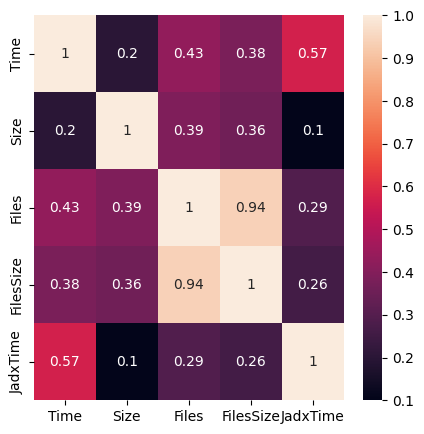

In [4]:
#df["JadxTime"] = df["Time"] - df["EarmoTime"] - df["KadabraTime"] - df["LintTime"] - df["ADoctorTime"] - df["PaprikaTime"] - df["Relda2Time"]

#corrDf = df[["Time", "Size", "Files", "FilesSize", "JadxTime"]]
corrDf = df[["Time", "Size", "Files", "FilesSize"]]
corr_mat = corrDf.corr().round(2)

plt.figure(figsize=(5,5))
plot = sns.heatmap(corr_mat, annot=True)
plot

#plt.savefig("graphs/correlation_matrix.png")

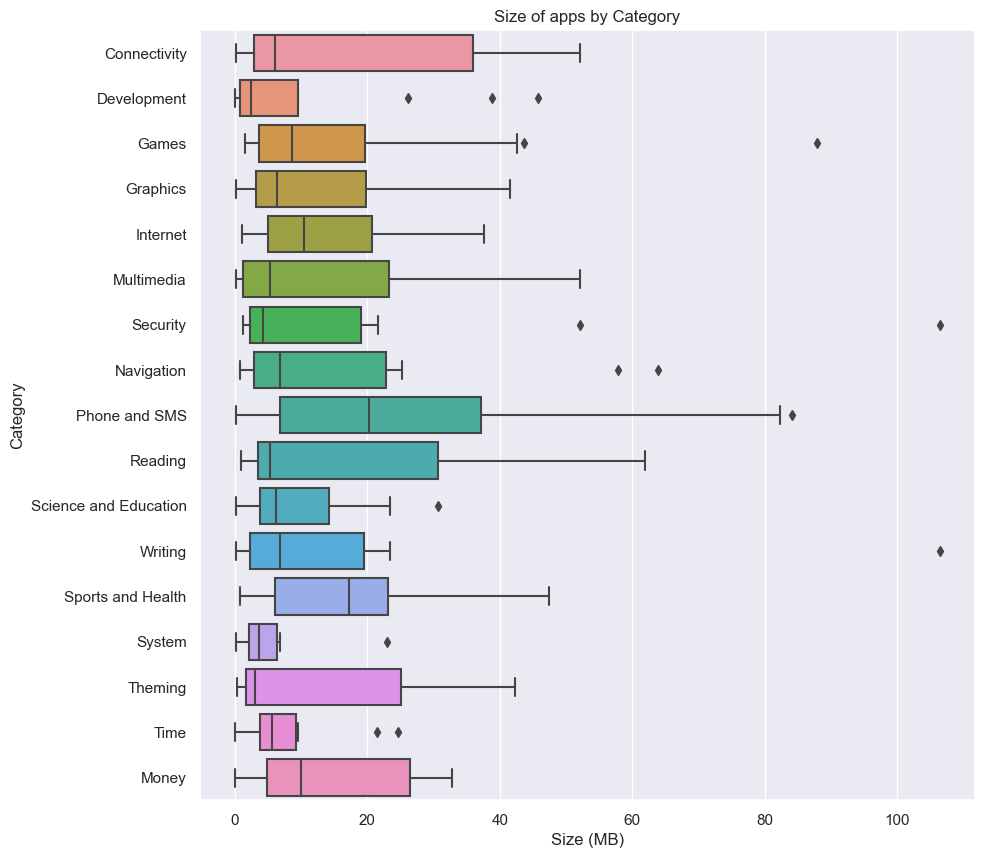

In [120]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
plot = sns.boxplot(y=df["Category"], x=df["Size"]).set(title="Size of apps by Category", xlabel="Size (MB)")
plot

plt.savefig("graphs/size_distribution_per_category.png", bbox_inches = 'tight')

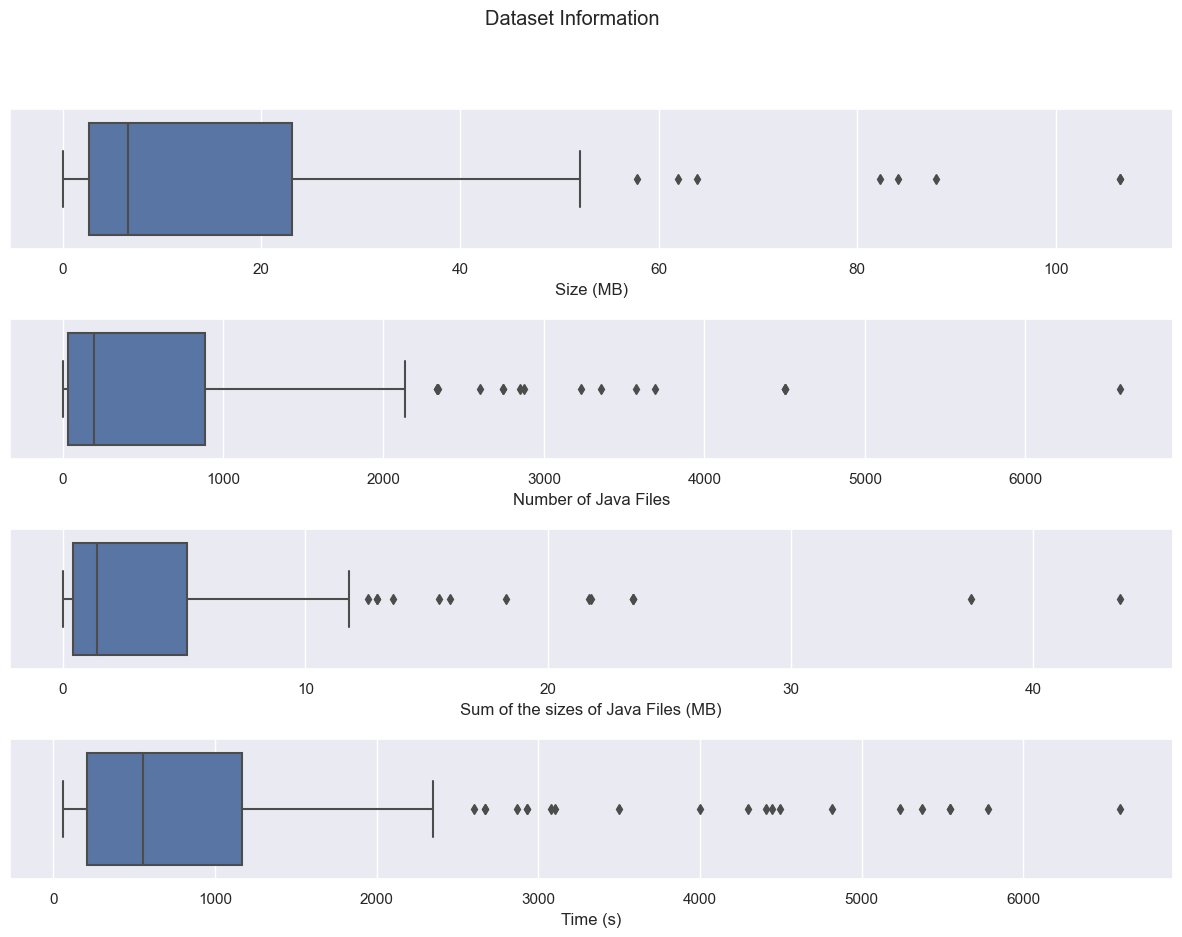

In [171]:
sns.set(font_scale=1)
fig, axes = plt.subplots(4, 1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle("Dataset Information")
sns.boxplot(ax=axes[0], x=df["Size"]).set(xlabel="Size (MB)")
sns.boxplot(ax=axes[1], x=df["Files"]).set(xlabel="Number of Java Files")
sns.boxplot(ax=axes[2], x=df["FilesSize"]).set(xlabel="Sum of the sizes of Java Files (MB)")
sns.boxplot(ax=axes[3], x=df["Time"]).set(xlabel="Time (s)")

plt.savefig("graphs/dataset_info.png")

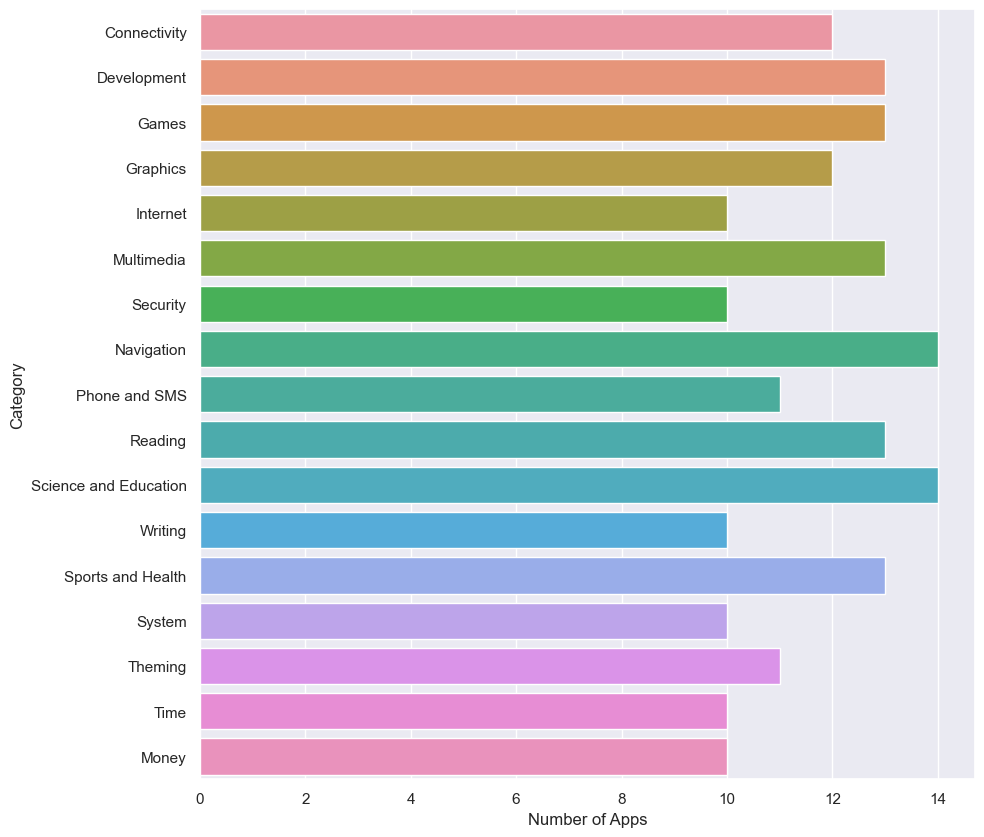

In [5]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.countplot(y=df["Category"]).set(xlabel="Number of Apps")

plt.savefig("graphs/dataset_info_categories.png")

[Text(0.5, 0, 'Labels'), Text(0, 0.5, 'Number of Apps')]

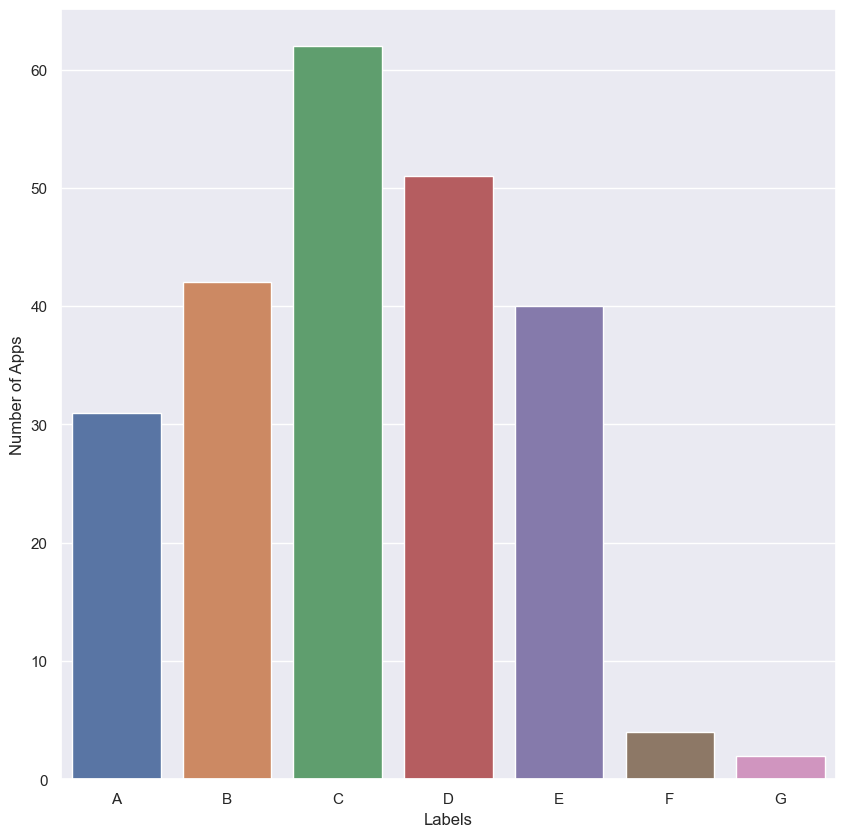

In [12]:
sns.set(font_scale=1)
plt.figure(figsize=(10,10))
sns.countplot(x=df["Label"], order=["A","B","C","D","E","F","G"]).set(xlabel="Labels", ylabel="Number of Apps")